In [4]:
%matplotlib inline
import csv
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

TRAIN_FILE_PATH = "data/X_train.csv"
TARGET_FILE_PATH =  "data/y_train.csv"
TEST_FILE_PATH = "data/X_test.csv"

In [59]:
#Load train and test set
print("\nTrain Data\n")

train_data = pd.read_csv(TRAIN_FILE_PATH)
train_data.drop(train_data.columns[0], axis=1, inplace=True)

Y_train = pd.read_csv(TARGET_FILE_PATH)
Y_train.drop(Y_train.columns[0], axis=1, inplace = True)

print("\nTest Data\n")

test_data =  pd.read_csv(TEST_FILE_PATH)
id_test = test_data.columns[0]
#test_data.drop(test_data.columns[0], axis=1, inplace=True)


Train Data


Test Data



In [6]:
# fill missing values with mean column values train and test set
def fill_NaN(train, test):
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    train_mean_values = train.mean()
    train =  train.fillna(train_mean_values)
    test = test.fillna(train_mean_values)
    
    return train,test


In [7]:
train_data_mean, test_data_mean = fill_NaN(train_data, test_data)

Train shape:  (1212, 887)
Test shape:  (776, 887)


In [8]:
#Zero mean unit variance for train and test data
def scale_data(train, test):
    
    print("Train shape: ", train.shape)
    print("Test shape: ",test.shape)
    scaler = StandardScaler().fit(train, Y_train)
    #print(train_data_mean.shape)
    #print(test_data_mean.shape)
    train = scaler.transform(train)
    test = scaler.transform(test)
   
    return train, test

In [9]:
X_train_scaled, X_test_scaled = scale_data(train_data_mean, test_data_mean)

Train shape:  (1212, 887)
Test shape:  (776, 887)


(1212, 887)
(1212, 1)
[3.17463281e+02 3.09312060e+02 3.07583691e+02 2.85601310e+02
 2.78761802e+02 2.78148971e+02 2.73253960e+02 2.52760516e+02
 2.43972974e+02 2.43891857e+02 2.42925703e+02 2.38413283e+02
 2.00450421e+02 1.88501078e+02 1.87394892e+02 1.85534631e+02
 1.83031939e+02 1.77067457e+02 1.73985580e+02 1.72904968e+02
 1.63621244e+02 1.59121648e+02 1.58715436e+02 1.58235651e+02
 1.58076335e+02 1.54792017e+02 1.51246158e+02 1.50905309e+02
 1.50059132e+02 1.44974863e+02 1.41936780e+02 1.41853063e+02
 1.38327690e+02 1.37595239e+02 1.36981311e+02 1.33495247e+02
 1.29886104e+02 1.27973959e+02 1.27868471e+02 1.27800779e+02
 1.23643847e+02 1.21575634e+02 1.19960216e+02 1.17397751e+02
 1.16924717e+02 1.16108916e+02 1.15126528e+02 1.14374064e+02
 1.12846943e+02 1.11589434e+02 1.11331764e+02 1.09974839e+02
 1.08125510e+02 1.05072321e+02 1.01706441e+02 9.78253813e+01
 9.36728322e+01 9.31268014e+01 9.19324055e+01 8.80093999e+01
 8.72718824e+01 8.72661510e+01 8.71275443e+01 8.69762456e+01
 8

/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/francesco/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & 

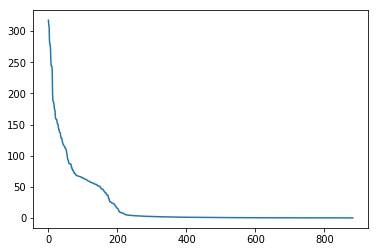

In [79]:
#Extract the features to use

n_features_fr = 50

print(X_train_scaled.shape)
print(Y_train.shape)
features_scores = f_regression(X_train_scaled,Y_train)[0]
#print(features_scores)
y = list(features_scores)
myarray = np.asarray(y)
print(-1*np.sort(-1*myarray))
#print(-1*np.sort(myarray-1))
plt.plot(-1*np.sort(-1*myarray))

indices_fr = myarray.argsort()[-50:][::-1]
print(indices_fr)



/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50building tree 5 of 50
building tree 6 of 50

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s


building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.0s finished


[2.11071161e-01 9.43825903e-02 4.43131986e-02 3.93068012e-02
 1.74559783e-02 1.70167787e-02 1.43848408e-02 1.06187602e-02
 9.02853957e-03 8.66229141e-03 8.62429446e-03 6.17836656e-03
 5.98765925e-03 5.35135227e-03 4.92401100e-03 4.73049074e-03
 4.62582256e-03 4.55336978e-03 4.51499917e-03 4.24726238e-03
 3.88922438e-03 3.66027592e-03 3.58313095e-03 3.38521283e-03
 3.32599604e-03 3.31456149e-03 2.92076494e-03 2.90918916e-03
 2.86644553e-03 2.82972692e-03 2.65573745e-03 2.57063163e-03
 2.50950381e-03 2.38168748e-03 2.36080079e-03 2.29201383e-03
 2.26622522e-03 2.26524660e-03 2.23168961e-03 2.21310064e-03
 2.15005181e-03 2.12852493e-03 2.11254173e-03 2.04778680e-03
 2.04584388e-03 2.02829443e-03 1.99414013e-03 1.99065543e-03
 1.92305173e-03 1.91250612e-03 1.90011198e-03 1.86498241e-03
 1.84199214e-03 1.83413464e-03 1.78833706e-03 1.78105408e-03
 1.74515721e-03 1.71525074e-03 1.67846648e-03 1.66183428e-03
 1.65965665e-03 1.65489276e-03 1.60718825e-03 1.60692585e-03
 1.60184809e-03 1.601435

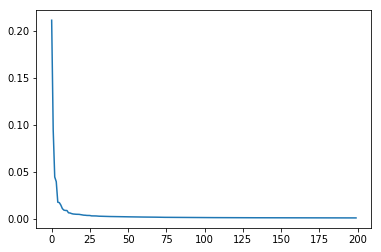

In [66]:
#Extract feature importance of Random Forest & find intersection with f_regression one

n_features_rf = 100

rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X_train_scaled,Y_train)

scores = list(rf.feature_importances_)
my_rf_features = np.asarray(scores)
print(-1*np.sort(-1*my_rf_features))
#print(-1*np.sort(myarray-1))
plt.plot((-1*np.sort(-1*my_rf_features))[0:200])

indices_rf = my_rf_features.argsort()[-200:][::-1]
print(indices_rf)
#print(-1*np.sort(-1*rf.feature_importances_));


In [ ]:
# Find intersection between best f_regression features and random forest's

print(set(indices_rf).intersection(indices_fr))

indices = set(indices_rf).intersection(indices_fr)

In [80]:
#Extract the feature selected from dataset

#indices = indices_rf
indices = indices_fr
#indices = list(indices)

X_train_subset = train_data_mean[train_data_mean.columns[indices]]
X_test_subset = test_data_mean[train_data_mean.columns[indices]]

#print(X_subset.head(1))

X_train_subset, X_test_subset = fill_NaN(X_train_subset, X_test_subset)
X_train_subset, X_test_subset = scale_data(X_train_subset, X_test_subset)

print(X_train_subset.shape)

Train shape:  (1212, 50)
Test shape:  (776, 50)
Train shape:  (1212, 50)
Test shape:  (776, 50)
(1212, 50)


In [351]:
#model = MLPRegressor(batch_size = 200,validation_fraction=0.05, verbose=True, tol = 0.00000001,learning_rate_init=0.0001)

model = MLPRegressor(learning_rate='constant', 
                         hidden_layer_sizes=(50,30),
                         activation='logistic', 
                         learning_rate_init=0.01,
                         max_iter=15000, 
                         early_stopping =True,
                         validation_fraction=0.1,
                         tol=0.00000000001,
                         alpha=0.1,
                         #n_iter_no_change=100,
                         verbose=True)
model.fit(X_train_subset,Y_train)

#score = cross_val_score((model), X_train_subset, Y_train, scoring='r2', cv=4)
#print(score.mean())

/home/francesco/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:1306: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 2448.78627045
Validation score: -52.883935
Iteration 2, loss = 2329.22285537
Validation score: -50.717433
Iteration 3, loss = 2239.08660436
Validation score: -48.813341
Iteration 4, loss = 2154.98609248
Validation score: -46.909513
Iteration 5, loss = 2069.01342318
Validation score: -44.904162
Iteration 6, loss = 1979.02136627
Validation score: -42.885823
Iteration 7, loss = 1890.36114840
Validation score: -40.929949
Iteration 8, loss = 1805.41792614
Validation score: -39.093777
Iteration 9, loss = 1725.44342513
Validation score: -37.338606
Iteration 10, loss = 1648.59083859
Validation score: -35.659618
Iteration 11, loss = 1575.50996297
Validation score: -34.046934
Iteration 12, loss = 1505.10203614
Validation score: -32.502340
Iteration 13, loss = 1437.64526734
Validation score: -30.998213
Iteration 14, loss = 1370.39596577
Validation score: -29.431636
Iteration 15, loss = 1301.13837053
Validation score: -27.923319
Iteration 16, loss = 1235.92809213
Validation sco

MLPRegressor(activation='logistic', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(50, 30), learning_rate='constant',
       learning_rate_init=0.01, max_iter=15000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=1e-11, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [82]:
#y_pred = model.predict(X_test_subset)
test_data["y"] = predictions
#print(y_pred)

In [83]:
# create submission
test_data[["id", "y"]].to_csv("submissions/keras_second.csv", index= False)

In [84]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU
from keras.optimizers import Adam
# fix random seed for reproducibility
Y = Y_train/100
print(Y)
# create model
model = Sequential()
model.add(Dense(100, input_dim=50, init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(50, init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(100, init='RandomUniform'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, init='RandomUniform', activation='sigmoid'))
# Compile model
optimizer = Adam(lr=0.000005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='mean_absolute_error', optimizer=optimizer)
# Fit the model
model.fit(x=X_train_subset, y=Y, epochs=150, verbose=2, validation_split=0.1, shuffle=False, steps_per_epoch=100, initial_epoch=0, validation_steps=10)
# calculate predictions
print(X_test_subset)
predictions = model.predict(X_test_subset)
# round predictions
#ages = [x*100 for x in predictions]
predictions = predictions*100
print(predictions)

         y
0     0.75
1     0.76
2     0.74
3     0.70
4     0.74
5     0.79
6     0.90
7     0.82
8     0.64
9     0.55
10    0.48
11    0.73
12    0.72
13    0.55
14    0.80
15    0.81
16    0.69
17    0.78
18    0.70
19    0.66
20    0.76
21    0.82
22    0.75
23    0.66
24    0.67
25    0.73
26    0.82
27    0.50
28    0.72
29    0.63
...    ...
1182  0.59
1183  0.72
1184  0.69
1185  0.67
1186  0.88
1187  0.66
1188  0.80
1189  0.84
1190  0.62
1191  0.73
1192  0.67
1193  0.78
1194  0.84
1195  0.78
1196  0.78
1197  0.76
1198  0.53
1199  0.85
1200  0.66
1201  0.67
1202  0.57
1203  0.73
1204  0.74
1205  0.55
1206  0.83
1207  0.69
1208  0.73
1209  0.78
1210  0.78
1211  0.56

[1212 rows x 1 columns]


/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, input_dim=50, kernel_initializer="RandomUniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(50, kernel_initializer="RandomUniform")`
  if sys.path[0] == '':
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, kernel_initializer="RandomUniform")`
  
/home/francesco/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="RandomUniform")`
  app.launch_new_instance()


Train on 1090 samples, validate on 122 samples
Epoch 1/150
 - 2s - loss: 0.1995 - val_loss: 0.1972
Epoch 2/150
 - 1s - loss: 0.1989 - val_loss: 0.1965
Epoch 3/150
 - 1s - loss: 0.1982 - val_loss: 0.1957
Epoch 4/150
 - 1s - loss: 0.1972 - val_loss: 0.1945
Epoch 5/150
 - 1s - loss: 0.1960 - val_loss: 0.1930
Epoch 6/150
 - 1s - loss: 0.1944 - val_loss: 0.1910
Epoch 7/150
 - 1s - loss: 0.1924 - val_loss: 0.1884
Epoch 8/150
 - 1s - loss: 0.1898 - val_loss: 0.1851
Epoch 9/150
 - 1s - loss: 0.1865 - val_loss: 0.1809
Epoch 10/150
 - 1s - loss: 0.1826 - val_loss: 0.1759
Epoch 11/150
 - 1s - loss: 0.1778 - val_loss: 0.1700
Epoch 12/150
 - 1s - loss: 0.1724 - val_loss: 0.1630
Epoch 13/150
 - 1s - loss: 0.1664 - val_loss: 0.1551
Epoch 14/150
 - 1s - loss: 0.1600 - val_loss: 0.1466
Epoch 15/150
 - 1s - loss: 0.1529 - val_loss: 0.1375
Epoch 16/150
 - 1s - loss: 0.1454 - val_loss: 0.1292
Epoch 17/150
 - 1s - loss: 0.1376 - val_loss: 0.1217
Epoch 18/150
 - 1s - loss: 0.1297 - val_loss: 0.1144
Epoch 19

[[74.87093 ]
 [77.0924  ]
 [70.81241 ]
 [61.117847]
 [72.06407 ]
 [62.60753 ]
 [83.95675 ]
 [64.82088 ]
 [76.78029 ]
 [63.637226]
 [72.85804 ]
 [59.793587]
 [63.913525]
 [74.261665]
 [71.42836 ]
 [75.52963 ]
 [64.0994  ]
 [84.03121 ]
 [64.42637 ]
 [63.1882  ]
 [68.111595]
 [63.792793]
 [83.99524 ]
 [68.79386 ]
 [70.44969 ]
 [57.311565]
 [61.389088]
 [83.01357 ]
 [80.45956 ]
 [65.098366]
 [53.181828]
 [74.25245 ]
 [64.75328 ]
 [66.32595 ]
 [64.12046 ]
 [66.76507 ]
 [75.38709 ]
 [58.62745 ]
 [69.91357 ]
 [72.65422 ]
 [71.51096 ]
 [76.81411 ]
 [59.225327]
 [61.644447]
 [64.33907 ]
 [59.841393]
 [74.61882 ]
 [75.517746]
 [74.00392 ]
 [76.29652 ]
 [57.903408]
 [68.32003 ]
 [63.168854]
 [57.34187 ]
 [59.569942]
 [70.99272 ]
 [79.98103 ]
 [56.288876]
 [59.89615 ]
 [78.63417 ]
 [77.98239 ]
 [78.86535 ]
 [77.662346]
 [69.30898 ]
 [59.699707]
 [65.497055]
 [73.397446]
 [79.85325 ]
 [57.66905 ]
 [62.960606]
 [71.02245 ]
 [68.53978 ]
 [81.69659 ]
 [74.75214 ]
 [63.003033]
 [71.42739 ]
 [71.15842 ]